# Neural Networks as Universal Approximators

## Basic Structure of a Neural Network

A neural network is a mathematical function that takes inputs, transforms them through layers of computation, and produces outputs. In a standard neural network:

1. Each input is multiplied by a set of weights, which are adjustable values, or *parameters*.
2. These weighted inputs are summed together and passed through an *activation function* that adds non-linearity to the network.
3. The outputs of one layer become the inputs to the next layer, repeating the process until we reach the final layer, which produces the network’s prediction.

The initial weights are typically set randomly, so a newly initialized neural network doesn’t perform any useful task—it behaves as a random function. The real magic of neural networks happens when we adjust these weights to improve the network’s performance on a specific task, a process called *training*.

## Neural Networks as Flexible Function Approximators

With deep neural networks, we use observational data to jointly learn both a representation via hidden layers and a linear predictor that acts upon that representation.

By combining multiple layers, each with its own parameters and activation functions, neural networks can approximate highly complex functions. This capability is central to the Universal Approximation Theorem, which states that a neural network with enough parameters can approximate any continuous function.

### The Building Blocks of Neural Networks
The two fundamental operations in neural networks are:

1. **Matrix Multiplication**: This involves multiplying inputs by weights and adding biases. In neural networks, this operation is the core of each layer’s computation.
2. **Activation Functions**: Non-linear functions, like the rectified linear unit (ReLU), allow the network to capture complex patterns. ReLU replaces negative values with zero, enabling the network to learn non-linear transformations.

Here’s a simple implementation of a rectified linear function (ReLU):

In [2]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

Here's what it looks like:

In [7]:
from ipywidgets import interact
from fastai.basics import *

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

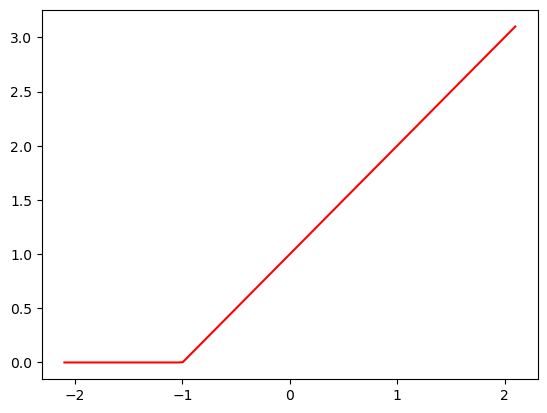

In [9]:
plot_function(partial(rectified_linear, 1,1))

To understand how this function works, try using this interactive version to play around with the parameters `m` and `b`:

In [10]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

As you see, `m` changes the slope, and `b` changes where the "hook" appears. This function doesn't do much on its own, but let's see what happens when we add two of them together:

In [11]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

By stacking and combining ReLU functions, neural networks can create intricate mappings between inputs and outputs. This allows them to approximate non-linear functions, which is essential for tasks like image recognition and natural language processing.

This exact same approach can be expanded to functions of 2, 3, or more parameters.

The basic idea is that by using multiple **linear layers** in a model, we allow it to perform more computations, thereby making it capable of modeling increasingly complex functions. However, if we simply stack one linear layer directly after another without any nonlinearity in between, it does not increase the expressive power of the model.

### Why Multiple Linear Layers Alone are Not Sufficient

Let’s break this down mathematically:

1. **Linear Transformation**: A linear layer performs a transformation on its input, given by:

   $$
   f(x) = W \cdot x + b
   $$
   
   where:
   - $ W $ is a matrix of weights,
   - $ x $ is the input vector, and
   - $ b $ is a bias vector.

2. **Composition of Linear Functions**: Suppose we apply two consecutive linear layers, $ f(x) = W_1 \cdot x + b_1 $ and $ g(x) = W_2 \cdot f(x) + b_2 $. Expanding $ g(x) $ yields:
   
   $$
   g(x) = W_2 \cdot (W_1 \cdot x + b_1) + b_2
   $$

   This simplifies to:
   
   $$
   g(x) = (W_2 \cdot W_1) \cdot x + (W_2 \cdot b_1 + b_2)
   $$
   
   which is again a linear transformation of $ x $. Thus, applying multiple linear layers in sequence still results in a single linear transformation. 

> **Mathematical Insight**: The composition of two linear transformations is itself a linear transformation. Therefore, stacking multiple linear layers without any nonlinear activation functions in between results in a model no more expressive than a single linear layer.



### Adding Nonlinearity: The Key to Complex Representations

To overcome this limitation, we introduce a **nonlinear function**, also known as an **activation function**, between the layers. This breaks the linearity of the transformation chain and allows each layer to learn different aspects of the data.

Consider the **ReLU (Rectified Linear Unit)** activation function, which is one of the simplest and most effective nonlinear functions in deep learning. ReLU is defined as:

$$
\text{ReLU}(z) = \max(0, z)
$$

where $ z = W \cdot x + b $.

ReLU has two important properties:
1. **Nonlinearity**: By setting negative values to zero, ReLU introduces a nonlinear element, which means that the composition of layers containing ReLU functions is no longer purely linear.
2. **Conditional Behavior**: The ReLU function can be thought of as a simple `if` statement that returns 0 for negative inputs and the input itself for positive inputs, effectively adding a decision-making element to each layer.

### Building Complex Models with Layers and Activation Functions

With this nonlinear function, we can build a network that consists of:
- A **sequence of linear transformations** (layers), each with its own set of weights and biases.
- **Activation functions** (such as ReLU) inserted between these layers to add complexity to the model’s behavior.

Consider a neural network with two layers:
1. **First Layer**: Applies a linear transformation, followed by a ReLU: 

   $$
   h(x) = \text{ReLU}(W_1 \cdot x + b_1)
   $$  

2. **Second Layer**: Applies another linear transformation to the output of the ReLU:

   $$
   f(x) = W_2 \cdot h(x) + b_2
   $$

Now, $ f(x) $ is no longer a simple linear function of $ x $; it is a composition of linear and nonlinear transformations, enabling it to capture much more complex patterns.

### The Universal Approximation Theorem

The addition of nonlinearity allows neural networks to approximate any continuous function to an arbitrary degree of accuracy, provided they have enough layers and units. This concept is formalized in the **Universal Approximation Theorem**, which states that:

> A neural network with at least one hidden layer containing a sufficient number of neurons, and a non-linear activation function, can approximate any continuous function on a compact subset of $\mathbb{R}^n$ to any desired accuracy.

This means that, theoretically, a neural network with just one hidden layer and a nonlinear activation function can approximate functions as complex as we need, given sufficient capacity.


## Activation Functions

Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it. They are differentiable operators for transforming input signals to outputs, while most of them add nonlinearity. Because activation functions are fundamental to deep learning, let’s briefly survey some common ones.

### ReLU Function

The most popular choice, due to both simplicity of implementation and its good performance on a variety of predictive tasks, is the rectified linear unit (ReLU) (Nair and Hinton, 2010). ReLU provides a very simple nonlinear transformation. Given an element, the function is defined as the maximum of that element and 

$$
\text{ReLU}(z) = \max(0, z)
$$

Informally, the ReLU function retains only positive elements and discards all negative elements by setting the corresponding activations to 0. To gain some intuition, we can plot the function. As you can see, the activation function is piecewise linear.

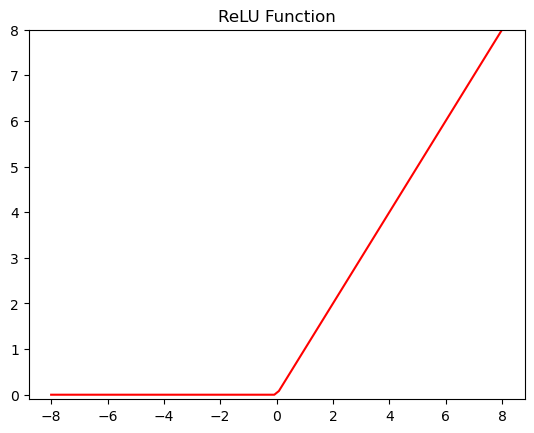

In [35]:
plot_function(torch.relu, title='ReLU Function', min=-8, max=8, color='r', ylim=(-0.1,8))

When the input is negative, the derivative of the ReLU function is 0, and when the input is positive, the derivative of the ReLU function is 1. Note that the ReLU function is not differentiable when the input takes value precisely equal to 0. In these cases, we default to the left-hand-side derivative and say that the derivative is 0 when the input is 0. We can get away with this because the input may never actually be zero (mathematicians would say that it is nondifferentiable on a set of measure zero).

The reason for using ReLU is that its derivatives are particularly well behaved: either they vanish or they just let the argument through. This makes optimization better behaved and it mitigated the well-documented problem of vanishing gradients that plagued previous versions of neural networks.

### Sigmoid Function

The *sigmoid function* transforms those inputs whose values lie in the
domain $\mathbb{R}$, to outputs that lie on the interval (0, 1).
For that reason, the sigmoid is often called a *squashing function*: it
squashes any input in the range (-inf, inf) to some value in the range
(0, 1):

$$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

In the earliest neural networks, scientists were interested in modeling
biological neurons that either *fire* or *do not fire*. Thus the
pioneers of this field, going all the way back to McCulloch and Pitts,
the inventors of the artificial neuron, focused on thresholding units. A thresholding activation takes value 0
when its input is below some threshold and value 1 when the input
exceeds the threshold.

When attention shifted to gradient-based learning, the sigmoid function
was a natural choice because it is a smooth, differentiable
approximation to a thresholding unit. Sigmoids are still widely used as
activation functions on the output units when we want to interpret the
outputs as probabilities for binary classification problems: you can
think of the sigmoid as a special case of the softmax. However, the
sigmoid has largely been replaced by the simpler and more easily
trainable ReLU for most use in hidden layers. Much of this has to do
with the fact that the sigmoid poses challenges for optimization since its gradient vanishes for large
positive *and* negative arguments. This can lead to plateaus that are
difficult to escape from. Nonetheless sigmoids are important. For example, recurrent neural networks leverage sigmoid units to control the
flow of information across time.

Below, we plot the sigmoid function. Note that when the input is close
to 0, the sigmoid function approaches a linear transformation.


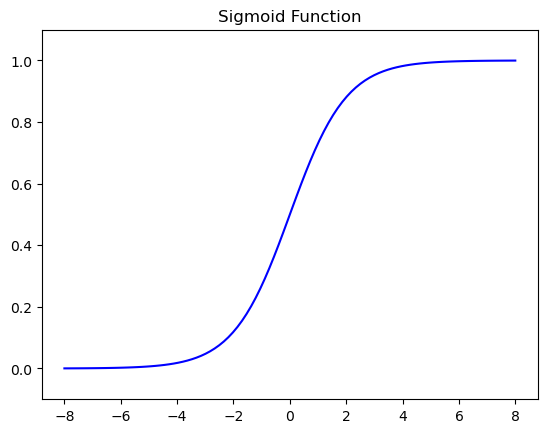

In [32]:
plot_function(torch.sigmoid, title='Sigmoid Function', min=-8, max=8, color='b', ylim=(-0.1,1.1))

The derivative of the sigmoid function is given by the following
equation:

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

Note that when the input is 0, the derivative of the sigmoid function reaches a maximum
of 0.25. As the input diverges from 0 in either direction, the
derivative approaches 0.

### Tanh Function

Like the sigmoid function, the tanh (hyperbolic tangent) function also
squashes its inputs, transforming them into elements on the interval
between $-1$ and $1$:

$$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

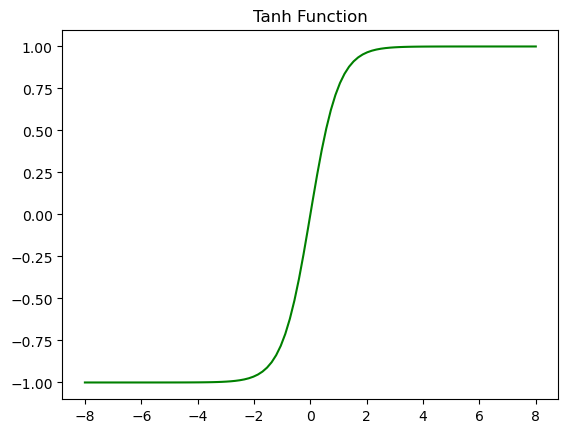

In [36]:
plot_function(torch.tanh, title='Tanh Function', min=-8, max=8, color='g', ylim=(-1.1,1.1))

Note that as input nears 0, the tanh
function approaches a linear transformation. Although the shape of the
function is similar to that of the sigmoid function, the tanh function
exhibits point symmetry about the origin of the coordinate system